In [103]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

import joblib

import warnings
warnings.filterwarnings('ignore')

In [104]:
pip install --pre pycaret -q

In [105]:
pip install autoviz -q

In [106]:
pip install shap

In [161]:
from pycaret.regression import *


ImportError: cannot import name '_fit_context' from 'sklearn.base' (/usr/local/lib/python3.10/dist-packages/sklearn/base.py)

In [108]:
import lightgbm as lgbm

from lightgbm import LGBMRegressor

In [109]:
#Read the dataset and print the top 5 rows of the dataset
df = pd.read_csv("housePrice.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61667
1,60,1,True,True,True,Shahran,1850000000,61667
2,79,2,True,True,True,Pardis,550000000,18333
3,95,2,True,True,True,Shahrake Qods,902500000,30083
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333


In [110]:
df.shape

(3479, 8)

In [111]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [112]:
df.sample(6)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
902,57,1,True,True,True,East Ferdows Boulevard,2050000000,68333
785,125,3,True,True,True,Shahran,5550000000,185000
2185,56,1,True,True,True,Shahr-e-Ziba,2200000000,73333
293,135,3,True,True,True,Pasdaran,8100000000,270000
729,55,1,False,True,False,Karoon,850000000,28333
3046,56,2,True,True,False,Andisheh,515000000,17167


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   int64  
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(2)
memory usage: 146.2+ KB


In [114]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [115]:
df.describe()

,Room,Price,Price(USD)
count,3479,3479,3479
mean,2,5359022711,178634
std,1,8099934524,269998
min,0,3600000,120
25%,2,1418250000,47275
50%,2,2900000000,96667
75%,2,6000000000,200000
max,5,92400000000,3080000


In [116]:
df.dropna(inplace = True)

In [117]:
df.Area.unique()

array(['63', '60', '79', '95', '123', '70', '87', '59', '54', '71', '68',
       '64', '136', '155', '140', '42', '93', '65', '99', '105', '160',
       '77', '110', '100', '90', '49', '96', '67', '62', '55', '129',
       '109', '58', '150', '130', '88', '51', '113', '98', '75', '61',
       '72', '122', '215', '101', '53', '74', '114', '151', '300', '76',
       '148', '40', '128', '94', '97', '137', '85', '78', '48', '82',
       '120', '139', '66', '80', '44', '50', '121', '141', '127', '180',
       '158', '144', '245', '190', '108', '117', '200', '125', '236',
       '220', '86', '84', '106', '320', '154', '210', '124', '83', '270',
       '104', '103', '165', '135', '132', '81', '153', '166', '175',
       '170', '115', '118', '116', '43', '230', '91', '126', '450', '500',
       '145', '112', '192', '164', '265', '92', '143', '350', '335',
       '235', '225', '221', '312', '188', '198', '650', '179', '256',
       '257', '167', '246', '168', '280', '69', '400', '660', '213', '

In [118]:
df['Area'] = df['Area'].apply(lambda x: re.sub(',', '', x))
df["Area"] = pd.to_numeric(df["Area"] , errors='coerce')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   int64  
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   bool   
 3   Warehouse   3456 non-null   bool   
 4   Elevator    3456 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   int64  
 7   Price(USD)  3456 non-null   float64
dtypes: bool(3), float64(1), int64(3), object(1)
memory usage: 172.1+ KB


In [120]:
df.describe()

,Area,Room,Price,Price(USD)
count,3456,3456,3456,3456
mean,8802191,2,5379956887,179332
std,317778302,1,8121729348,270724
min,30,0,3600000,120
25%,69,2,1420000000,47333
50%,90,2,2900000000,96667
75%,121,2,6000000000,200000
max,16160000000,5,92400000000,3080000


In [121]:
print(df.Parking.value_counts(normalize = True)*100)

True    85
False   15
Name: Parking, dtype: float64


In [122]:
print(df.Elevator.value_counts(normalize = True)*100)

True    79
False   21
Name: Elevator, dtype: float64


In [123]:
print(df.Warehouse.value_counts(normalize = True)*100)

True    91
False    9
Name: Warehouse, dtype: float64


In [124]:
pd.crosstab(df.Elevator, df.Room)

Room,0,1,2,3,4,5
Elevator,,,,,,
False,8,282,352,49,17,27
True,2,387,1591,682,53,6


In [125]:
pd.crosstab(df.Parking, df.Room)

Room,0,1,2,3,4,5
Parking,,,,,,
False,8,243,244,26,1,5
True,2,426,1699,705,69,28


In [126]:
pd.crosstab(df.Warehouse, df.Room)

Room,0,1,2,3,4,5
Warehouse,,,,,,
False,5,109,149,21,3,7
True,5,560,1794,710,67,26


In [127]:
above_3Rooms = df[df.Room>3]
len(above_3Rooms)

103

In [128]:
below_90m2 = df[df.Area<90]
len(below_90m2)

1673

In [129]:
df.Address.unique()

array(['Shahran', 'Pardis', 'Shahrake Qods', 'Shahrake Gharb',
       'North Program Organization', 'Andisheh', 'West Ferdows Boulevard',
       'Narmak', 'Saadat Abad', 'Zafar', 'Islamshahr', 'Pirouzi',
       'Shahrake Shahid Bagheri', 'Moniriyeh', 'Velenjak', 'Amirieh',
       'Southern Janatabad', 'Salsabil', 'Zargandeh', 'Feiz Garden',
       'Water Organization', 'ShahrAra', 'Gisha', 'Ray', 'Abbasabad',
       'Ostad Moein', 'Farmanieh', 'Parand', 'Punak', 'Qasr-od-Dasht',
       'Aqdasieh', 'Pakdasht', 'Railway', 'Central Janatabad',
       'East Ferdows Boulevard', 'Pakdasht KhatunAbad', 'Sattarkhan',
       'Baghestan', 'Shahryar', 'Northern Janatabad', 'Daryan No',
       'Southern Program Organization', 'Rudhen', 'West Pars', 'Afsarieh',
       'Marzdaran', 'Dorous', 'Sadeghieh', 'Chahardangeh', 'Baqershahr',
       'Jeyhoon', 'Lavizan', 'Shams Abad', 'Fatemi',
       'Keshavarz Boulevard', 'Kahrizak', 'Qarchak',
       'Northren Jamalzadeh', 'Azarbaijan', 'Bahar',
       'P

In [130]:
len(df.Address.unique())

192

In [131]:
pd.set_option('display.float_format', lambda x: '%.f' % x)
df.groupby("Room").Price.mean()

Room
0    7860500000
1    1707480867
2    3330303037
3   10938692886
4   25600328571
5   33734393939
Name: Price, dtype: float64

In [132]:
room_parking_price_mean_df = df.groupby( ['Room','Parking'] )['Price'].mean().reset_index()
room_parking_price_mean_df

,Room,Parking,Price
0,0,False,9769750000
1,0,True,223500000
2,1,False,1139677778
3,1,True,2031368545
4,2,False,1501674180
5,2,True,3592919541
6,3,False,5107865385
7,3,True,11153730496
8,4,False,6200000000
9,4,True,25881492754


In [133]:
df2 = df.copy()
df2.loc[:,"Price"] = df["Price"].map("{:,.0f}".format)
df2.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,"1,850,000,000",61667
1,60,1,True,True,True,Shahran,"1,850,000,000",61667
2,79,2,True,True,True,Pardis,"550,000,000",18333
3,95,2,True,True,True,Shahrake Qods,"902,500,000",30083
4,123,2,True,True,True,Shahrake Gharb,"7,000,000,000",233333


In [134]:
df = df.drop("Price(USD)", axis = 1)
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1850000000
1,60,1,True,True,True,Shahran,1850000000
2,79,2,True,True,True,Pardis,550000000
3,95,2,True,True,True,Shahrake Qods,902500000
4,123,2,True,True,True,Shahrake Gharb,7000000000


### **Pycaret**

In [135]:
#setup(data = df,target = "Price", session_id = 85, remove_outliers = True)

In [136]:
#models()

In [137]:
#compare_models()

### **Visualization**

<Figure size 800x500 with 0 Axes>

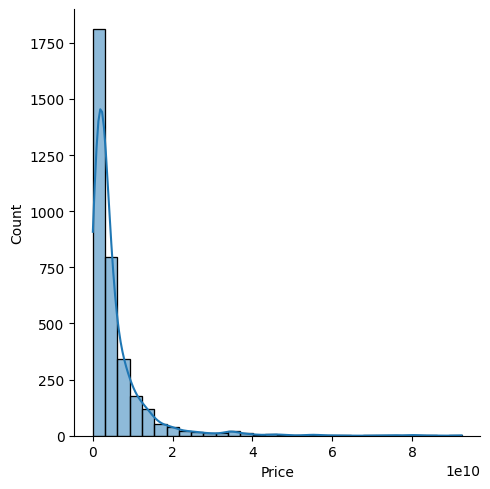

In [138]:
plt.figure(figsize = (8,5))
sns.displot(df["Price"], bins = 30, kde = True)

<Axes: >

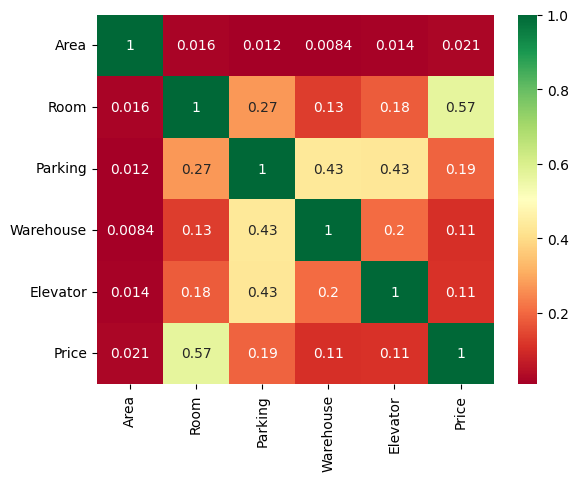

In [139]:
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

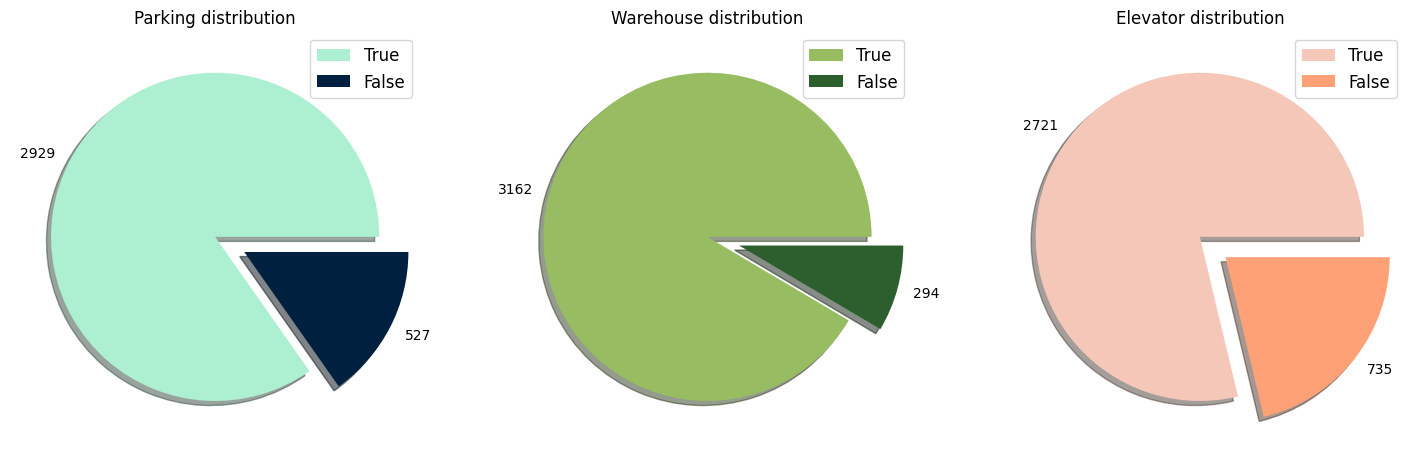

In [140]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))

colors = [['#ADEFD1FF', '#00203FFF'], ['#97BC62FF', '#2C5F2D'], ['#F5C7B8FF', '#FFA177FF']]
explode = [0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']
for i in range(3):
        data = df[columns[i]].value_counts()
        ax[i].pie(data, labels=data.values, explode=explode, colors=colors[i], shadow=True)
        ax[i].legend(labels=data.index, fontsize='large')
        ax[i].set_title('{} distribution'.format(columns[i]))

Text(0.5, 1.0, 'Number of flats in location')

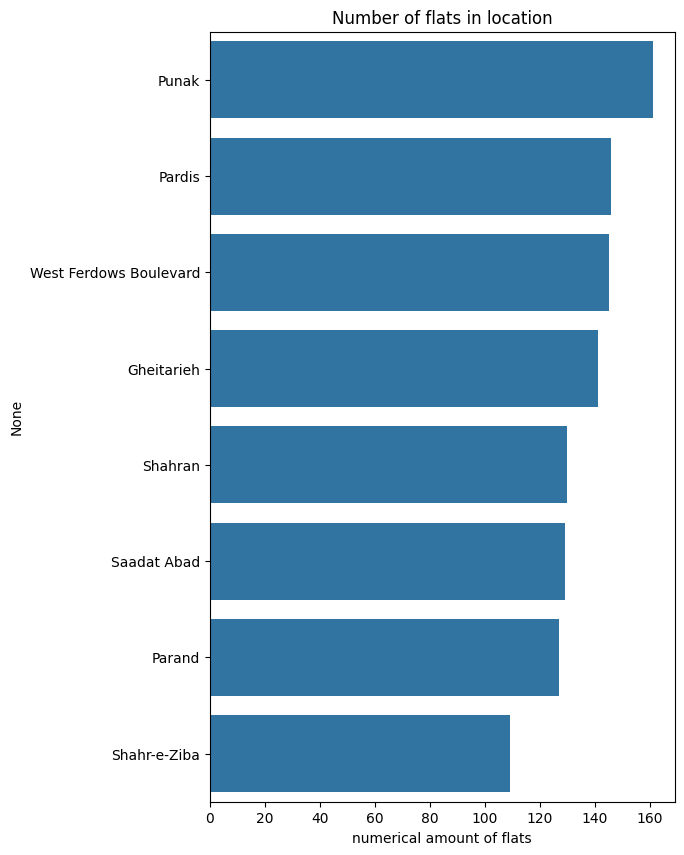

In [141]:
df3 = df['Address'].value_counts().copy()
df3 = df3[:8]
fig, ax = plt.subplots(figsize=(6,10))
sns.barplot(x=df3.values, y=df3.index,ax=ax)
plt.xlabel('numerical amount of flats')
plt.title('Number of flats in location')

In [142]:
df.sort_values('Price',ascending=False)[['Address']].head(20)

,Address
1707,Zaferanieh
1810,Abazar
430,Lavasan
819,Ekhtiarieh
1332,Niavaran
1694,Zafar
3051,Dorous
3107,Tajrish
831,Mahmoudieh
2394,Aqdasieh


# Model Building

In [143]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1850000000
1,60,1,True,True,True,Shahran,1850000000
2,79,2,True,True,True,Pardis,550000000
3,95,2,True,True,True,Shahrake Qods,902500000
4,123,2,True,True,True,Shahrake Gharb,7000000000


In [144]:
#df = df.drop(columns = ['Price(USD)'])
boolean_features = ['Parking','Warehouse','Elevator']
df[boolean_features] = df[boolean_features].astype('int64')

df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,Shahran,1850000000
1,60,1,1,1,1,Shahran,1850000000
2,79,2,1,1,1,Pardis,550000000
3,95,2,1,1,1,Shahrake Qods,902500000
4,123,2,1,1,1,Shahrake Gharb,7000000000


In [145]:
address_dummy = pd.get_dummies(df['Address'])
df_final = df.merge(address_dummy, left_index = True, right_index = True)
df_final.drop(columns = 'Address', inplace = True)
df_final.head(3)

,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Absard,Abuzar,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,2,1,1,1,550000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
df_final

,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Absard,Abuzar,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,2,1,1,1,550000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,95,2,1,1,1,902500000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,123,2,1,1,1,7000000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,3500000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3475,83,2,1,1,1,6800000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3476,75,2,0,0,0,365000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3477,105,2,1,1,1,5600000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
print(f"Skewness of features:\n{df.skew()}")


Skewness of features:
Area        44
Room         1
Parking     -2
Warehouse   -3
Elevator    -1
Price        5
dtype: float64


<Axes: xlabel='Price'>

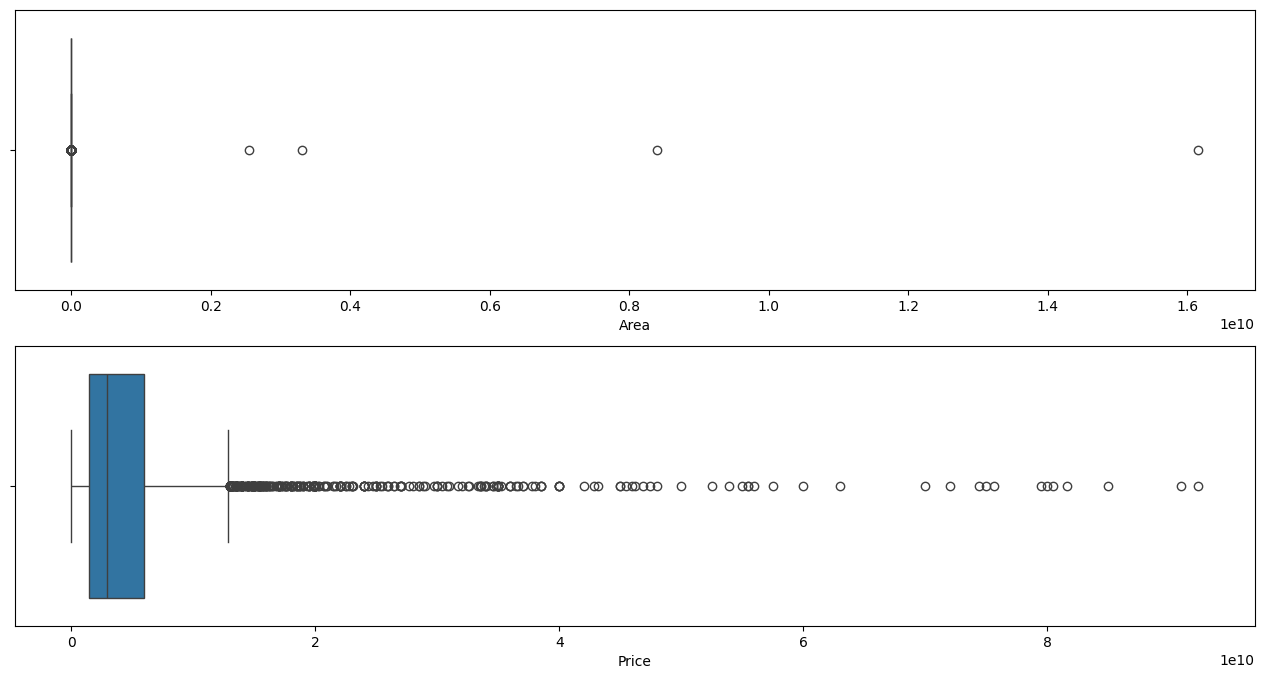

In [148]:
plt.figure(figsize = (16,8))

plt.subplot(2,1,1)
sns.boxplot(x = df_final['Area'])

plt.subplot(2,1,2)
sns.boxplot(x = df_final['Price'])

In [149]:
def lower_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return lower, upper

lower_area, upper_area = lower_upper(df['Area'])
lower_price, upper_price = lower_upper(df['Price'])

print(f"Lower limit for area: {lower_area:0.2f}")
print(f"Upper limit for area: {upper_area:0.2f}")
print(f"Lower limit for price: {lower_price:,}")
print(f"Upper limit for price: {upper_price:,}")

Lower limit for area: -9.00
Upper limit for area: 199.00
Lower limit for price: -5,450,000,000.0
Upper limit for price: 12,870,000,000.0


In [150]:
area_outliers = np.where(df['Area'] > upper_area)
price_outliers = np.where(df['Price'] > upper_price)
# Return the unique, sorted array of values that are in either of the two input arrays.
total_outliers = np.union1d(area_outliers, price_outliers)

print(f"Number of area outliers: {len(df.iloc[area_outliers])}")
print(f"Number of price outliers: {len(df.iloc[price_outliers])}")
print(f"Number of outliers: {len(df.iloc[total_outliers])}")

Number of area outliers: 237
Number of price outliers: 310
Number of outliers: 366


In [151]:
total_outliers

array([  25,   58,   83,  101,  145,  159,  160,  166,  173,  176,  187,
        189,  193,  195,  196,  200,  210,  215,  218,  220,  226,  234,
        235,  238,  260,  262,  264,  269,  270,  281,  283,  284,  297,
        299,  315,  327,  329,  338,  339,  340,  342,  343,  344,  345,
        346,  347,  348,  349,  351,  353,  355,  356,  362,  363,  364,
        394,  410,  411,  412,  429,  430,  436,  439,  458,  463,  496,
        512,  514,  515,  516,  525,  534,  547,  553,  559,  564,  565,
        566,  567,  569,  572,  576,  577,  578,  579,  582,  599,  600,
        610,  627,  635,  638,  640,  641,  648,  649,  652,  706,  712,
        721,  729,  730,  731,  738,  739,  740,  753,  765,  792,  803,
        804,  816,  819,  828,  834,  836,  849,  872,  876,  891,  955,
        956,  962, 1005, 1006, 1012, 1021, 1022, 1028, 1031, 1033, 1103,
       1110, 1114, 1128, 1136, 1137, 1148, 1174, 1175, 1228, 1230, 1231,
       1232, 1258, 1260, 1265, 1266, 1270, 1282, 12

In [152]:
X = df_final.drop(columns = 'Price')
y = df_final['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(f"shape of x train: {X_train.shape}")
print(f"shape of y train: {y_train.shape}")
print(f"shape of x test: {X_test.shape}")
print(f"shape of y train: {y_test.shape}")

shape of x train: (2764, 197)
shape of y train: (2764,)
shape of x test: (692, 197)
shape of y train: (692,)


In [153]:
def parameter_finder (model, parameters):

    start = time.time()

    grid = GridSearchCV(model,
                        param_grid = parameters,
                        refit = True,
                        cv = KFold(shuffle = True, random_state = 1),
                        n_jobs = -1)
    grid_fit = grid.fit(X_train, y_train)
    y_train_pred = grid_fit.predict(X_train)
    y_pred = grid_fit.predict(X_test)

    train_score =grid_fit.score(X_train, y_train)
    test_score = grid_fit.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

    model_name = str(model).split('(')[0]

    end = time.time()

    print(f"The best parameters for {model_name} model is: {grid_fit.best_params_}")
    print("--" * 10)
    print(f"(R2 score) in the training set is {train_score:0.2%} for {model_name} model.")
    print(f"(R2 score) in the testing set is {test_score:0.2%} for {model_name} model.")
    print(f"RMSE is {RMSE:,} for {model_name} model.")
    print("--" * 10)
    print(f"Runtime of the program is: {end - start:0.2f}")


    return train_score, test_score, RMSE

In [154]:
lr = LinearRegression(n_jobs = -1)

lr_train_score, lr_test_score, lr_RMSE = parameter_finder(lr, {})


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [155]:
lgbm_model = LGBMRegressor(n_jobs = -1)
param_lgbm = {}
lgbm_train_score, lgbm_test_score, lgbm_RMSE = parameter_finder(lgbm_model, param_lgbm)

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [ ]:
ridge = Ridge(random_state = 1) # Linear least squares with l2 regularization.
param_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

ridge_train_score, ridge_test_score, ridge_RMSE = parameter_finder(ridge, param_ridge)


In [ ]:
lasso = Lasso(random_state = 1) # Linear Model trained with L1 prior as regularizer.
param_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

lasso_train_score, lasso_test_score, lasso_RMSE = parameter_finder(lasso, param_lasso)

In [ ]:
eln = ElasticNet(random_state = 1) # Linear regression with combined L1 and L2 priors as regularizer.
param_eln = {'alpha': [0.001, 0.01, 0.1, 1, 10],
            'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7]}

eln_train_score, eln_test_score, eln_RMSE = parameter_finder(eln, param_eln)

In [ ]:
dtr = DecisionTreeRegressor(random_state = 1)
param_dtr = {'min_samples_split': [2, 3, 4, 5],
            'min_samples_leaf': [1, 2, 3]}

dtr_train_score, dtr_test_score, dtr_RMSE = parameter_finder(dtr, param_dtr)

In [ ]:
rfr = RandomForestRegressor(random_state = 1, n_jobs = -1)
param_rfr = {'min_samples_split': [2, 3, 4, 5],
            'min_samples_leaf': [1, 2, 3]}

rfr_train_score, rfr_test_score, rfr_RMSE = parameter_finder(rfr, param_rfr)

In [ ]:
knr = KNeighborsRegressor(n_jobs = -1)
param_knr = {'n_neighbors': [5, 10, 15, 20],
            'weights': ['uniform', 'distance']}

knr_train_score, knr_test_score, knr_RMSE = parameter_finder(knr, param_knr)

In [ ]:
xgboost = XGBRegressor(n_jobs = -1)
param_xgboost = {'n_estimators': [100,300],
             'learning_rate': [0.1,0.05],
             'subsample': [0.75],
             'colsample_bytree': [1],
             'max_depth': [3,4,5],
             'gamma': [0]}

xgboost_train_score, xgboost_test_score, xgboost_RMSE = parameter_finder(xgboost, param_xgboost)

In [ ]:
models_score = pd.DataFrame({'Training score': [lr_train_score, ridge_train_score, lasso_train_score, eln_train_score, dtr_train_score, rfr_train_score, knr_train_score,xgboost_train_score],
                             'Testing score': [lr_test_score, ridge_test_score, lasso_test_score, eln_test_score, dtr_test_score, rfr_test_score, knr_test_score,xgboost_test_score],
                             'RMSE': [lr_RMSE, ridge_RMSE, lasso_RMSE, eln_RMSE, dtr_RMSE, rfr_RMSE, knr_RMSE,xgboost_RMSE]},
                             index = ['LinearRegression', 'Ridge', 'Lasso','ElasticNet', 'DecisionTreeRegressor', 'RandomForestRegressor', 'KNeighborsRegressor','XGBoostRegressor'])

models_score

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

sns.set(style='white')

ax.set_title("Camparison", fontsize = 20)

ax = sns.barplot(x = list(models_score.index), y = models_score['RMSE']/1000000000, alpha = 0.7, palette='Greens_r')

ax.set_ylabel("RMSE\n(billion tomans)", fontsize = 20)

sec_ax = ax.twinx()

sec_ax = sns.lineplot(x = list(models_score.index), y = models_score['Training score'], linewidth = 3, color = 'blue')
sec_ax = sns.scatterplot(x = list(models_score.index), y = models_score['Training score'], s = 200)

sec_ax = sns.lineplot(x = list(models_score.index), y = models_score['Testing score'], linewidth = 3, color = 'red')
sec_ax = sns.scatterplot(x = list(models_score.index), y = models_score['Testing score'], s = 200)

sec_ax.set_ylabel("R2 scores", fontsize = 20)

sec_ax.legend(labels = ['Training score', 'Testing score'], fontsize = 20)


sns.despine(offset = 10)

plt.show()

[link text](https://)# Save your Model

In [ ]:
my_model = 'finalized_model.joblib'
joblib.dump(lgbm_model, my_model)


#grid = GridSearchCV(model,
 #                       param_grid = parameters,
 #                       refit = True,
 #                       cv = KFold(shuffle = True, random_state = 1),
 #                       n_jobs = -1)
 #   grid_fit = grid.fit(X_train, y_train)
 #   y_train_pred = grid_fit.predict(X_train)
 #   y_pred = grid_fit.predict(X_test)

In [ ]:
# # load the model from disk
# loaded_model = joblib.load('finalized_model.sav')
# result = loaded_model.score(X_test, y_test)
# print(result)